In [1]:
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import math

In [2]:
series = read_csv('AAPL.csv')
X = series[["Close"]].values
size = int(len(X) * 0.85)
train, test = X[0:size], X[size:len(X)]

In [3]:
series.tail()

,Date,Close
423,9/10/2020,113.489998
424,9/11/2020,112.000000
425,9/14/2020,115.360000
426,9/15/2020,115.540000
427,9/16/2020,112.130000


In [5]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,3))
	model_fit = model.fit(disp=-1)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
mape = np.mean(np.abs(predictions -test )/np.abs(test))
print('MAPE: '+str(mape))
error = mean_squared_error(test, predictions)
RMSE=math.sqrt(error)
print("RMSE: ", RMSE)

C:\Users\kensh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\kensh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\kensh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\kensh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\kensh\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\kensh\anaconda3\lib\site-packages\statsmodels\bas

MAPE: 0.021265466577718873
RMSE:  3.234098894455668


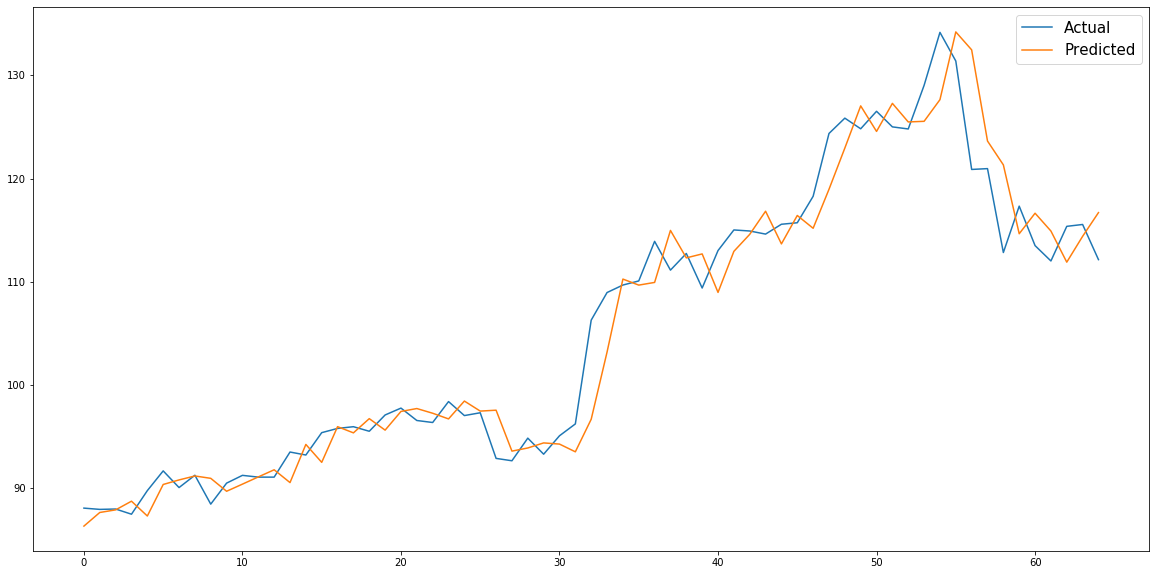

In [6]:
plt.figure(figsize=(20,10))
plt.plot(test,label="Actual")
plt.plot(predictions,label="Predicted")
plt.legend(fontsize=15)
plt.show()

The predictions are one time step ahead of the actual values. We need to shift the actual values by 1 time step (and put the dates on the x-axis).

In [7]:
from scipy.ndimage.interpolation import shift
test=shift(test.flatten()[1:], 1, cval=np.nan)
test

array([       nan,  87.897499,  87.932503,  87.43    ,  89.717499,
        91.6325  ,  90.014999,  91.209999,  88.407501,  90.445   ,
        91.199997,  91.027496,  91.027496,  93.462502,  93.172501,
        95.342499,  95.752502,  95.919998,  95.477501,  97.057503,
        97.724998,  96.522499,  96.327499,  98.357498,  97.      ,
        97.272499,  92.845001,  92.614998,  94.809998,  93.252502,
        95.040001,  96.190002, 106.260002, 108.9375  , 109.665001,
       110.0625  , 113.902496, 111.112503, 112.727501, 109.375   ,
       113.010002, 115.010002, 114.907501, 114.607498, 115.5625  ,
       115.707497, 118.275002, 124.370003, 125.857498, 124.824997,
       126.522499, 125.010002, 124.807503, 129.039993, 134.179993,
       131.399994, 120.879997, 120.959999, 112.82    , 117.32    ,
       113.489998, 112.      , 115.36    , 115.54    ])

In [8]:
predictions=np.array(predictions[1:]).reshape(1,-1)
predictions

array([[ 87.59779589,  87.85047916,  88.69202228,  87.25534237,
         90.31384399,  90.75617047,  91.13943674,  90.91086817,
         89.6559792 ,  90.34814768,  91.04785496,  91.74015282,
         90.49786169,  94.20025179,  92.46174629,  95.92407777,
         95.32269511,  96.70154791,  95.58702305,  97.40062293,
         97.68216793,  97.22538171,  96.67622231,  98.40820389,
         97.43375461,  97.52161676,  93.55080223,  93.85575194,
         94.34767301,  94.23358238,  93.48370185,  96.64307622,
        103.16197396, 110.24301271, 109.65811295, 109.91853196,
        114.9640253 , 112.30012034, 112.68424424, 108.94953451,
        112.93291903, 114.58353172, 116.82714205, 113.65718547,
        116.41399674, 115.17283774, 118.95228239, 122.95458998,
        127.04638263, 124.56955744, 127.29123344, 125.48859809,
        125.54998119, 127.65065283, 134.22445382, 132.4822605 ,
        123.63693661, 121.32315974, 114.64248307, 116.63248997,
        114.90556554, 111.88332812, 114.

In [9]:
date=series[["Date"]]
train_date, test_date = date[0:size], date[size:len(X)]
test_date

,Date
363,6/16/2020
364,6/17/2020
365,6/18/2020
366,6/19/2020
367,6/22/2020
...,...
423,9/10/2020
424,9/11/2020
425,9/14/2020
426,9/15/2020


In [10]:
index=pd.DataFrame(np.arange(363,428)).rename(columns={0:"index"})
test=pd.DataFrame(test).rename(columns={0:"Close"})
test=pd.concat([index,test],axis=1)
test

,index,Close
0,363,NaN
1,364,87.897499
2,365,87.932503
3,366,87.430000
4,367,89.717499
...,...,...
60,423,113.489998
61,424,112.000000
62,425,115.360000
63,426,115.540000


In [11]:
test=test.set_index("index")
test=pd.concat([test_date,test],axis=1)
test

,Date,Close
363,6/16/2020,NaN
364,6/17/2020,87.897499
365,6/18/2020,87.932503
366,6/19/2020,87.430000
367,6/22/2020,89.717499
...,...,...
423,9/10/2020,113.489998
424,9/11/2020,112.000000
425,9/14/2020,115.360000
426,9/15/2020,115.540000


In [12]:
predictions=pd.DataFrame(predictions)
predictions

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,87.597796,87.850479,88.692022,87.255342,90.313844,90.75617,91.139437,90.910868,89.655979,90.348148,...,134.224454,132.482261,123.636937,121.32316,114.642483,116.63249,114.905566,111.883328,114.391797,116.692345


In [13]:
predictions=predictions.T
predictions

,0
0,87.597796
1,87.850479
2,88.692022
3,87.255342
4,90.313844
...,...
59,116.632490
60,114.905566
61,111.883328
62,114.391797


In [14]:
predictions=predictions.rename(columns={0:"Predicted close"})
predictions

,Predicted close
0,87.597796
1,87.850479
2,88.692022
3,87.255342
4,90.313844
...,...
59,116.632490
60,114.905566
61,111.883328
62,114.391797


In [15]:
predictions=pd.concat([index,predictions],axis=1)
predictions=predictions.set_index("index")
predictions=pd.concat([test_date,predictions],axis=1)
predictions

,Date,Predicted close
363,6/16/2020,87.597796
364,6/17/2020,87.850479
365,6/18/2020,88.692022
366,6/19/2020,87.255342
367,6/22/2020,90.313844
...,...,...
423,9/10/2020,114.905566
424,9/11/2020,111.883328
425,9/14/2020,114.391797
426,9/15/2020,116.692345


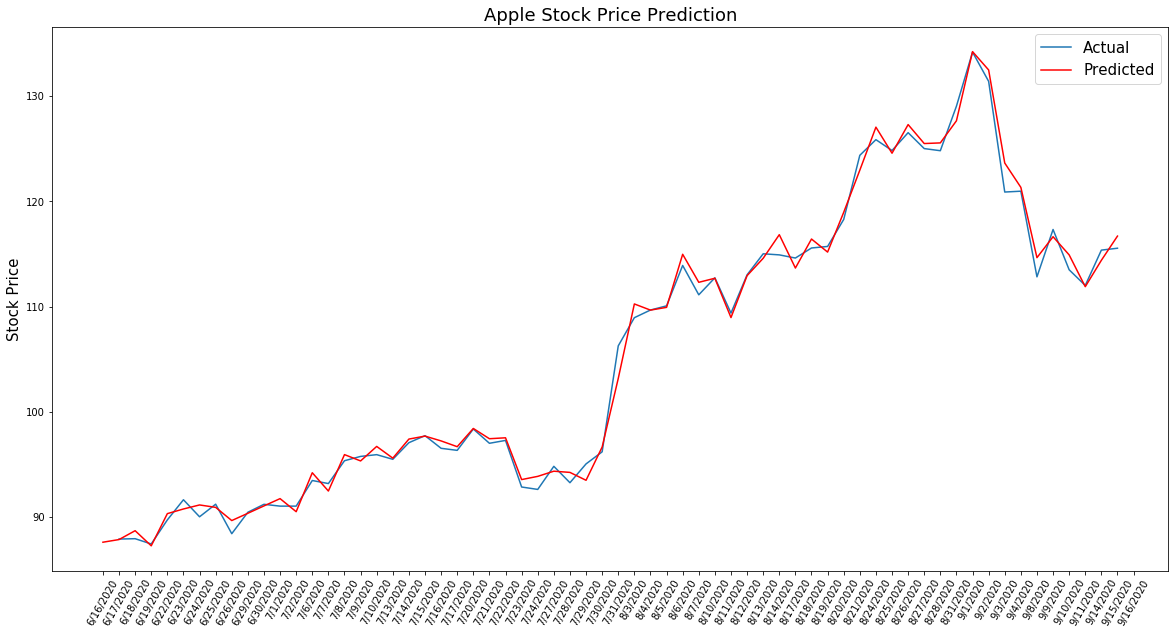

In [16]:
plt.figure(figsize=(20,10))
plt.plot(test["Date"],test["Close"],label="Actual")
plt.plot(predictions["Date"],predictions["Predicted close"], color='red',label="Predicted")
plt.title('Apple Stock Price Prediction',fontsize=18)
plt.ylabel('Stock Price',fontsize=15)
plt.legend(fontsize=15)
plt.xticks(rotation=60)
plt.show()

As shown, the model indeed did very well on predicting Tesla's closing price.

In [17]:
len(test)

65

In [27]:
fc, se, conf=model_fit.forecast(len(test)+7,alpha=0.01)

In [28]:
import datetime

def workdays(d, end, excluded=(6, 7)):
    days = []
    while d.date() <= end.date():
        if d.isoweekday() not in excluded:
            days.append(d)
        d += datetime.timedelta(days=1)
    return days

workdays=workdays(datetime.datetime(2020, 6, 16),
               datetime.datetime(2020, 9, 23 ))
workdays=pd.DataFrame(workdays).rename(columns={0:"Date"})

In [29]:
se=pd.DataFrame(conf).rename(columns={0:"lower bound",1:"upper bound"})
fc=pd.DataFrame(fc).rename(columns={0:"Predicted close"})
pd.concat([workdays,fc,se],axis=1)

,Date,Predicted close,lower bound,upper bound
0,2020-06-16,116.692345,112.299935,121.084755
1,2020-06-17,115.815316,109.952468,121.678165
2,2020-06-18,116.758213,109.585803,123.930623
3,2020-06-19,116.199166,107.938065,124.460267
4,2020-06-22,116.948692,107.820403,126.076980
...,...,...,...,...
67,2020-09-17,128.005831,92.525002,163.486661
68,2020-09-18,128.190201,92.442473,163.937930
69,2020-09-21,128.374576,92.361922,164.387229
70,2020-09-22,128.558954,92.283305,164.834602


In [33]:
forecast=pd.concat([workdays,fc,se],axis=1)
forecast=forecast.loc[67:72,:].rename(columns={"Predicted close":"Forecast"})
forecast

,Date,Forecast,lower bound,upper bound
67,2020-09-17,128.005831,92.525002,163.486661
68,2020-09-18,128.190201,92.442473,163.937930
69,2020-09-21,128.374576,92.361922,164.387229
70,2020-09-22,128.558954,92.283305,164.834602
71,2020-09-23,128.743335,92.206581,165.280089
